In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

코랩 사용하시는 분들은 아래의 코드를 실행해주세요!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd()

'/content'

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [4]:
path = '/content/drive/MyDrive/data/'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

In [5]:
os.getcwd()

'/content/drive/MyDrive/data'

사용할 데이터 셋 :  전력 사용량 예측 모델

아래의 과정에서 sklearn의 Pipeline의 사용은 필수는 아닙니다. 선호와 필요에 따라 사용하실 분들은 사용하셔도 좋습니다.

# 데이터

건물 정보와 기후 정보를 활용한 전력사용량 예측 데이터 중에서 

환경 변수(기온, 풍속, 습도, 강수량, 일조)에 대해 전력 사용량을 선형회귀 모델을 사용해서 예측해보고자 합니다.

In [6]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [7]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [8]:
def load_data():
    data = pd.read_csv('train.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [9]:
train_x, train_y, test_x, test_y = load_data()

## 데이터 확인 

주의! 최종 예측하는 단계 이전에는 현재 가지고 있는 데이터, 즉 train data만을 이용하여 작업을 진행해야 합니다.

현재 가지고 있는 데이터 train_x를 보고 전력 사용량을 예측하는데에 사용할 변수를 선택해주세요.

기초세션에서 다뤘던 내용을 참고하셔서 최적의 변수 조합을 찾아보도록 합시다.

이 때 선택해야하는 변수는 하나일 수도 있고, 여러개의 변수를 사용하여도 좋습니다.

In [10]:
import matplotlib as mpl
import seaborn as sns

In [11]:
# 데이터 셋을 둘러보는 코드 작성하시고, 왜 좋은지 한번 둘러보세요!
train_x.head()

,Temp,Wind,Moisture,Precipitation,Sun
0,17.6,2.5,92.0,0.8,0.0
1,17.7,2.9,91.0,0.3,0.0
2,17.5,3.2,91.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0


In [12]:
train_x.tail()

,Temp,Wind,Moisture,Precipitation,Sun
83,23.9,2.8,68.0,0.0,0.6
84,25.0,3.1,63.0,0.0,0.8
85,26.0,3.1,60.0,0.0,1.0
86,26.4,3.8,60.0,0.0,1.0
87,25.4,4.2,66.0,0.0,0.5


In [13]:
train_x.describe()

,Temp,Wind,Moisture,Precipitation,Sun
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,20.243182,2.630682,71.022727,0.038636,0.290909
std,3.284229,1.082712,15.966903,0.220986,0.415404
min,14.800000,0.400000,39.000000,0.000000,0.000000
25%,17.600000,2.000000,59.500000,0.000000,0.000000
50%,20.100000,2.500000,74.500000,0.000000,0.000000
75%,22.175000,3.200000,84.500000,0.000000,0.625000
max,28.200000,5.500000,93.000000,1.900000,1.000000


In [14]:
train_y.head()

0    8179.056
1    8135.640
2    8107.128
3    8048.808
4    8043.624
Name: Wh, dtype: float64

In [15]:
train_y.tail()

83    8386.416
84    8435.664
85    8591.184
86    8638.488
87    8663.112
Name: Wh, dtype: float64

In [16]:
train_y.describe()

count      88.000000
mean     8142.186273
std       203.650160
min      7784.424000
25%      8013.006000
50%      8093.196000
75%      8264.430000
max      8663.112000
Name: Wh, dtype: float64

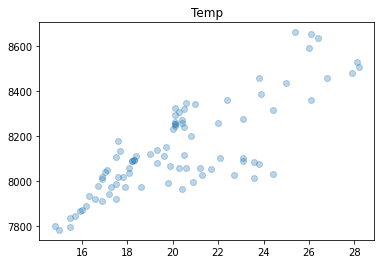

In [17]:
plt.scatter(train_x['Temp'],train_y, alpha = 0.3)
plt.title("Temp")
plt.show()

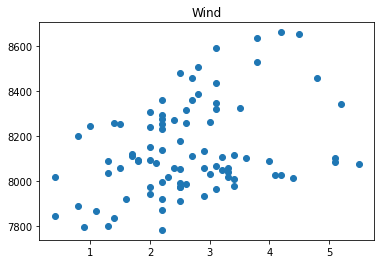

In [18]:
plt.scatter(train_x['Wind'],train_y)
plt.title("Wind")
plt.show()

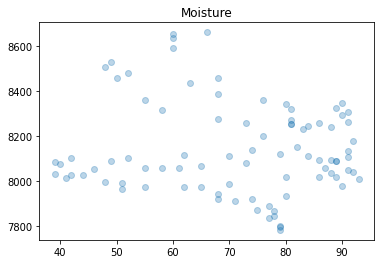

In [19]:
plt.scatter(train_x['Moisture'],train_y, alpha = 0.3)
plt.title("Moisture")
plt.show()

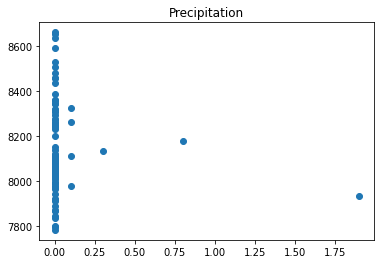

In [20]:
plt.scatter(train_x['Precipitation'],train_y)
plt.title("Precipitation")
plt.show()

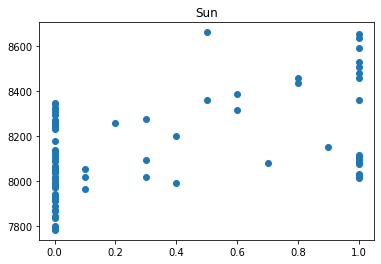

In [21]:
plt.scatter(train_x['Sun'],train_y)
plt.title("Sun")
plt.show()

In [26]:
train_x1 = train_x[['Temp']]
train_x1

,Temp
0,17.6
1,17.7
2,17.5
3,17.1
4,17.0
...,...
83,23.9
84,25.0
85,26.0
86,26.4


정답은 없습니다! 

다만 최종 선택한 변수(들)이 왜 선택받았는지 간단히 알려주세요.<br>
답변 : Temp(온도)를 변수로 선택하였다. Scatterplot을 통해 train_x의 각 변수들과 train_y의 관계를 파악하여 Temp, Wind, Moisture, Precipitation, Sun이 전력 사용량과 어떠한 상관관계를 갖는지 파악하였다. 그 결과, 가장 뚜렷한 상관관계를 보이는 변수가 Temp였기 때문에 이를 변수로 선택하였다. 나머지 변수들은 전력 사용량과 뚜렷한 상관관계를 찾아보기 힘들었기 때문에 한가지 변수만을 선정하게 되었다.

## 전처리

위에서 선택한 변수들(feature)를 가지고 한번 전력 사용량을 예측하는 모델을 만들어 보기에 앞서,

**train 데이터의 feature의 전처리**를 진행해보려고 합니다. StandardScaler를 사용하셔도 좋고, MinMaxScaler를 사용하셔도 좋습니다! 

또한 PolynomialFeatures를 이용하거나 직접 feature를 계산하여 고차원의 feature를 만드셔도 좋습니다. 이 또한 정답은 없습니다!

이 때 최종 train_x의 shape은 (n_samples, n_features)가 되도록 해주세요.<br>
ex. 4개의 변수를 가진 1000개의 샘플의 경우 train_x.shape은 (1000,4)가 되면 됩니다.

특히 하나의 변수만을 사용하시는 분들은 1D가 아닌 2D가 되도록 신경써주세요<br>
ex. train_x.shape이 (1000,)이 아닌 (1000,1)입니다!

In [27]:
# 사용할 패키지를 import!
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_x1)
processed_data = scaler.transform(train_x1)
processed_data

array([[0.20895522],
       [0.21641791],
       [0.20149254],
       [0.17164179],
       [0.1641791 ],
       [0.15671642],
       [0.14179104],
       [0.15671642],
       [0.2238806 ],
       [0.3358209 ],
       [0.42537313],
       [0.54477612],
       [0.61940299],
       [0.61940299],
       [0.65671642],
       [0.67164179],
       [0.71641791],
       [0.65671642],
       [0.58955224],
       [0.48507463],
       [0.37313433],
       [0.28358209],
       [0.23134328],
       [0.17910448],
       [0.13432836],
       [0.10447761],
       [0.08208955],
       [0.06716418],
       [0.05223881],
       [0.        ],
       [0.01492537],
       [0.05223881],
       [0.08955224],
       [0.15671642],
       [0.18656716],
       [0.20149254],
       [0.1119403 ],
       [0.20149254],
       [0.41791045],
       [0.45522388],
       [0.51492537],
       [0.47761194],
       [0.43283582],
       [0.41044776],
       [0.38059701],
       [0.35820896],
       [0.3358209 ],
       [0.313

In [29]:
processed_data.shape

(88, 1)

# 모델링

## 학습 

이제 모델링을 해봅시다.

앞서 다룬 여러 regression 모델들(Linear regression, Ridge Regression, Lasso Regression, ..)을 이용해서 fit을 진행해보도록 합시다.

In [30]:
# 사용할 패키지를 import!
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [31]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
# 1. Linear Regression
linear_model = LinearRegression().fit(train_x1, train_y)

In [52]:
# 2. Ridge Regression
ridge_model = Ridge(random_state=123).fit(train_x1, train_y)

In [33]:
# 3. Lasso Regression
lasso_model = Lasso(random_state=123).fit(train_x1, train_y)

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [35]:
# 1. Linear Regression
linear_esti_y = linear_model.predict(train_x1)

linear_beta = linear_model.coef_[0]
linear_intercept = linear_model.intercept_
print(f"Beta :{linear_beta: .4f}")
print(f"Intercept : {linear_intercept: .4f}")

Beta : 49.8115
Intercept :  7133.8431


In [37]:
# 2. Ridge Regression
ridge_esti_y = ridge_model.predict(train_x1)

ridge_beta = ridge_model.coef_[0]
ridge_intercept = ridge_model.intercept_
print(f"Beta :{ridge_beta: .4f}")
print(f"Intercept : {ridge_intercept: .4f}")

Beta : 49.7585
Intercept :  7134.9165


In [38]:
# 3. Lasso Regression
lasso_esti_y = lasso_model.predict(train_x1)

lasso_beta = lasso_model.coef_[0]
lasso_intercept = lasso_model.intercept_
print(f"Beta :{lasso_beta: .4f}")
print(f"Intercept : {lasso_intercept: .4f}")

Beta : 49.7177
Intercept :  7135.7414


# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [39]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [40]:
# 1. Linear Regression
train_mse = mse(linear_esti_y, train_y)
print(f"Linear {train_mse:.5f}")

Linear 14543.75828


In [53]:
# 2. Ridge Regression
train_mse = mse(ridge_esti_y, train_y)
print(f"Ridge {train_mse:.5f}")

Ridge 14543.78826


In [54]:
# 3. Lasso Regression
train_mse = mse(lasso_esti_y, train_y)
print(f"Lasso {train_mse:.5f}")

Lasso 14543.85206


In [66]:
def visualize(model, x, y):
    if x.shape[1] != 1:
        return None
    beta = model.coef_[0]
    intercept = model.intercept_
    
    x_axis = np.linspace(np.min(x), np.max(x), 100)
    fit = intercept * x_axis**0 + beta*x_axis 

    plt.figure(figsize=(8,6))
    plt.plot(x_axis, fit, label='Predict', c='r', linewidth=3)
    plt.scatter(x, y, c='blue')
    plt.legend()
    plt.show()

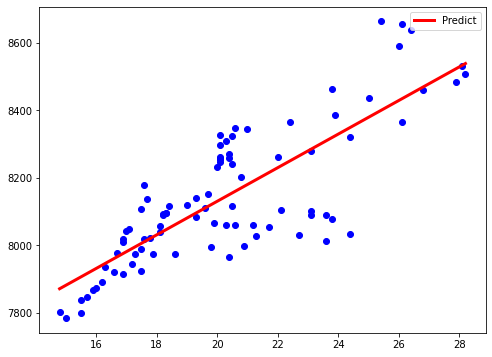

In [67]:
# visualization 하실 분은 진행해주세요!
visualize(linear_model, train_x1, train_y)

# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [109]:
# transform을 하시는 분들은 실행해주세요
test_x_t = scaler.transform(test_x1)

In [97]:
# y1_hat에 predict값 할당
# 1. Linear Regression
pred_y_linear = linear_model.predict(test_x1)
pred_y_linear

array([8344.26245576, 8289.46981005, 8269.54521161, 8214.75256591,
       8199.80911708, 8169.92221942, 8145.01647137, 8125.09187293,
       8115.12957371, 8105.16727449, 8095.20497527, 8095.20497527])

In [102]:
# 2. Ridge Regression
pred_y_ridge = ridge_model.predict(test_x1)
pred_y_ridge

array([8344.04734285, 8289.31302468, 8269.40963625, 8214.67531808,
       8199.74777676, 8169.89269412, 8145.01345858, 8125.11007016,
       8115.15837594, 8105.20668173, 8095.25498752, 8095.25498752])

In [103]:
# 3. Lasso Regression
pred_y_lasso = lasso_model.predict(test_x1)
pred_y_lasso

array([8343.88201932, 8289.19252837, 8269.30544075, 8214.61594979,
       8199.70063408, 8169.87000265, 8145.01114313, 8125.12405551,
       8115.1805117 , 8105.23696789, 8095.29342408, 8095.29342408])

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [85]:
def score(train_mse, test_mse):
    print(f"{test_mse/train_mse: .4f}")

In [104]:
test_mse_linear = mse(pred_y_linear, test_y)
print(f"Linear {test_mse_linear:.5f}")

Linear 198060.52184


In [105]:
test_mse_ridge = mse(pred_y_ridge, test_y)
print(f"Ridge {test_mse_ridge:.5f}")

Ridge 198088.31953


In [106]:
test_mse_lasso = mse(pred_y_lasso, test_y)
print(f"Lasso {test_mse_lasso:.5f}")

Lasso 198109.69544


In [89]:
score(train_mse,test_mse_linear)

 13.6182


In [107]:
score(train_mse,test_mse_ridge)

 13.6201


In [108]:
score(train_mse,test_mse_lasso)

 13.6215


In [101]:
# visualization 하실 분은 진행해주세요!
# visualize(linear_model, test_x, test_y)

# 그 이후

이제 여러분들은 한번 모델을 만들어보고 fitting한 다음 예측까지 해보셨습니다.

이제 개선하기 위해 1.데이터부터 5.성능평가 중 수정, 변경하실 부분을 업데이트 해서  최적의 모델을 찾아보세요!

현재 사용하고 있는 scaler, model부터 전처리과정 기타 여러 조건을 조작해보시고 어떤 효과가 있는지 한번 보시고 알려주세요:D

고생하셨습니다!